## CNN Model Definition

In [ ]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model

cnn_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
cnn_history = cnn_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(valid_images, valid_labels),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

#Output


```
# This is formatted as code
Epoch 1/5
71/71 [==============================] - 1581s 22s/step - loss: 1.3466 - accuracy: 0.7609 - val_loss: 1.1069 - val_accuracy: 0.7051
Epoch 2/5
71/71 [==============================] - 1564s 22s/step - loss: 0.2750 - accuracy: 0.9160 - val_loss: 0.9876 - val_accuracy: 0.7419
Epoch 3/5
71/71 [==============================] - 1563s 22s/step - loss: 0.1297 - accuracy: 0.9609 - val_loss: 1.0540 - val_accuracy: 0.7788
Epoch 4/5
71/71 [==============================] - 1554s 22s/step - loss: 0.1060 - accuracy: 0.9782 - val_loss: 1.0460 - val_accuracy: 0.8018
Epoch 5/5
71/71 [==============================] - 1554s 22s/step - loss: 0.1018 - accuracy: 0.9791 - val_loss: 1.1469 - val_accuracy: 0.7465

```




In [ ]:
import matplotlib.pyplot as plt

# Data from the training process
epochs = [1, 2, 3, 4, 5]
training_loss = [1.3466, 0.2750, 0.1297, 0.1060, 0.1018]
training_accuracy = [0.7609, 0.9160, 0.9609, 0.9782, 0.9791]
validation_loss = [1.1069, 0.9876, 1.0540, 1.0460, 1.1469]
validation_accuracy = [0.7051, 0.7419, 0.7788, 0.8018, 0.7465]

# Plotting training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#output

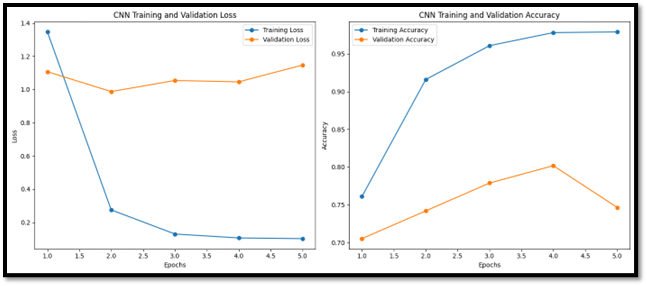


In [ ]:
# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"CNN Test accuracy: {cnn_test_accuracy}")

# Generate predictions
cnn_y_pred = cnn_model.predict(test_images)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)
cnn_true_labels = np.argmax(test_labels, axis=1)

# Determine the unique classes present in the test set
unique_classes = np.unique(cnn_true_labels)

# Filter label_names to include only the classes present in the test set
filtered_label_names = [label_names[i] for i in unique_classes]

print('CNN Classification Report')
print(classification_report(cnn_true_labels, cnn_y_pred, target_names=filtered_label_names))

print('CNN Confusion Matrix')
cnn_cm = confusion_matrix(cnn_true_labels, cnn_y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cnn_cm, annot=True, fmt='d', xticklabels=filtered_label_names, yticklabels=filtered_label_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#output



```
4/4 [==============================] - 79s 20s/step - loss: 2.2223 - accuracy: 0.8189
CNN Test accuracy: 0.8188976645469666
4/4 [==============================] - 79s 19s/step
CNN Classification Report
                 precision    recall  f1-score   support

     Cheesecake       0.86      0.60      0.71        10
       Macarons       0.85      0.96      0.90        74
 Macarons-Choco       0.00      0.00      0.00         1
  Macarons-Mint       0.00      0.00      0.00         2
  Macarons-Pink       0.00      0.00      0.00         1
   Macarons-Red       0.00      0.00      0.00         1
Macarons-Yellow       0.00      0.00      0.00         1
          Pizza       0.89      0.73      0.80        11
          Steak       1.00      0.67      0.80        15
       Tiramisu       0.53      0.82      0.64        11

       accuracy                           0.82       127
      macro avg       0.41      0.38      0.38       127
   weighted avg       0.80      0.82      0.80       127

CNN Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
```



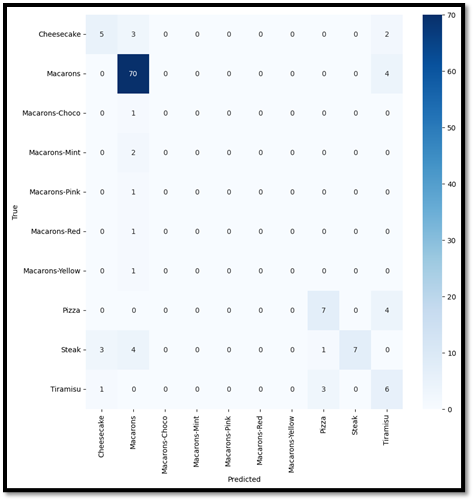